In [113]:
import pandas as pd
import numpy as np
from sklearn import (
    ensemble,
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (
    LogisticRegression,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import (
    KNeighborsClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
)
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns


In [114]:
train_kaggle = "/kaggle/input/titanic/train.csv"
test_kaggle = "/kaggle/input/titanic/test.csv"
gender_submission_kaggle = "/kaggle/input/titanic/gender_submission.csv"
train_local = "titanic/train.csv"
test_local = "titanic/test.csv"
gender_submission_local = "titanic/gender_submission.csv"


In [115]:
train_data = pd.read_csv(train_local)
original_train_data = train_data
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
test_data = pd.read_csv(test_local)
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data exploration


# Data meaning
![Cat](images/datas.png)

In [117]:
display(train_data.info())
display(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
def get_percentage_missing_data(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df

print(get_percentage_missing_data(train_data))

             percent_missing
PassengerId         0.000000
Survived            0.000000
Pclass              0.000000
Name                0.000000
Sex                 0.000000
SibSp               0.000000
Parch               0.000000
Ticket              0.000000
Fare                0.000000
Embarked            0.224467
Age                19.865320
Cabin              77.104377


In [119]:
categorical_variables = ["Sex", "Embarked","Pclass"]
numerical_variables = ["Age", "SibSp", "Parch","Fare"]

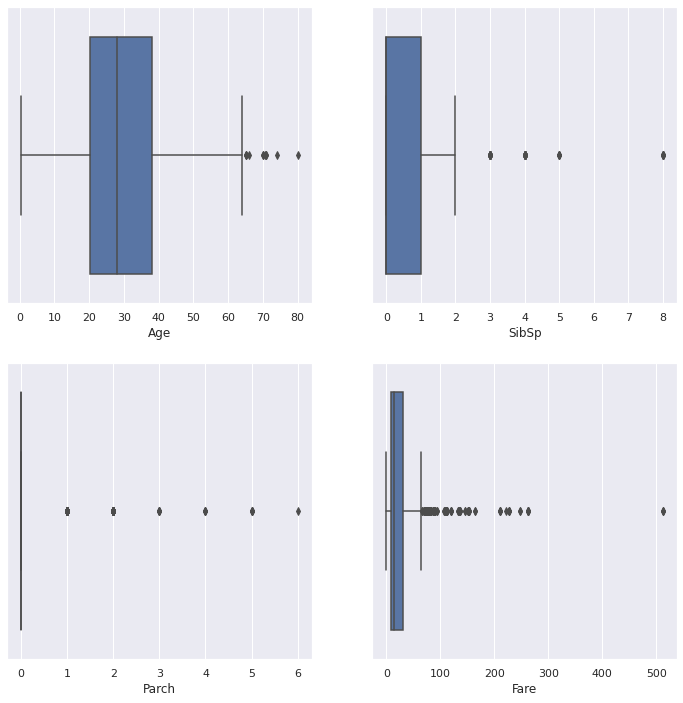

In [120]:
f, axes = plt.subplots(2, 2, figsize=(12, 12))
for f, ax in zip(numerical_variables, axes.ravel()):
    sns.boxplot(x=train_data[f], data=train_data, ax=ax)
sns.set(style="darkgrid")

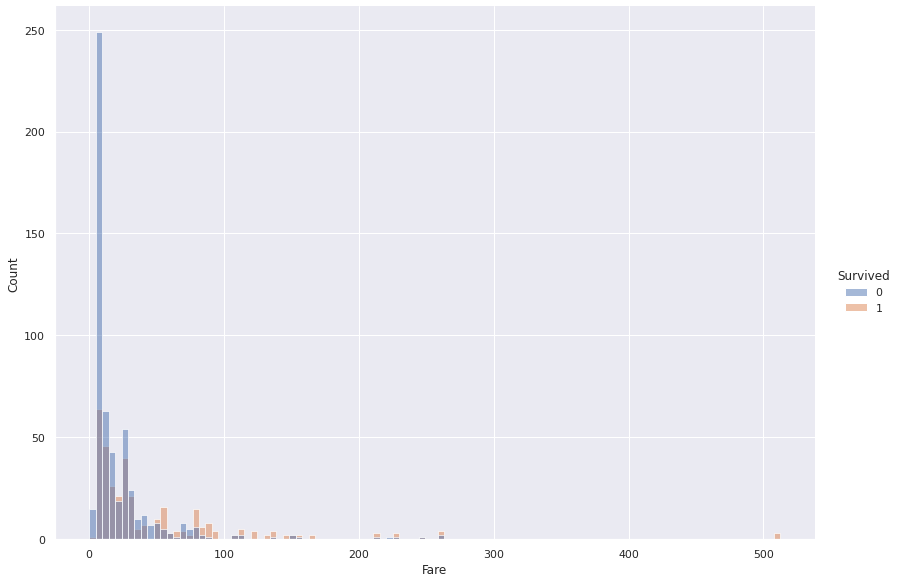

In [121]:
sns.displot(data=train_data,x="Fare", hue = "Survived",height=8.27, aspect=11.7/8.27)

In [122]:
from sklearn.preprocessing import StandardScaler
train_data["Fare"] = train_data["Fare"].replace(0,1)
train_data["Fare"] = np.log(train_data["Fare"])
scaled_features = ["Fare"]
scaler = StandardScaler()
train_data[scaled_features] = scaler.fit_transform(train_data[scaled_features])

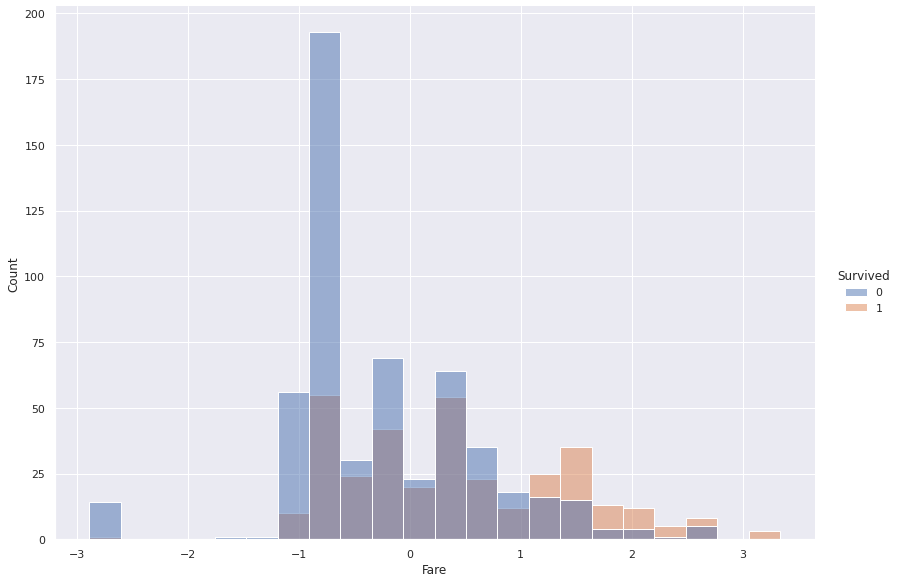

In [123]:
sns.displot(data=train_data,x="Fare", hue = "Survived",height=8.27, aspect=11.7/8.27)

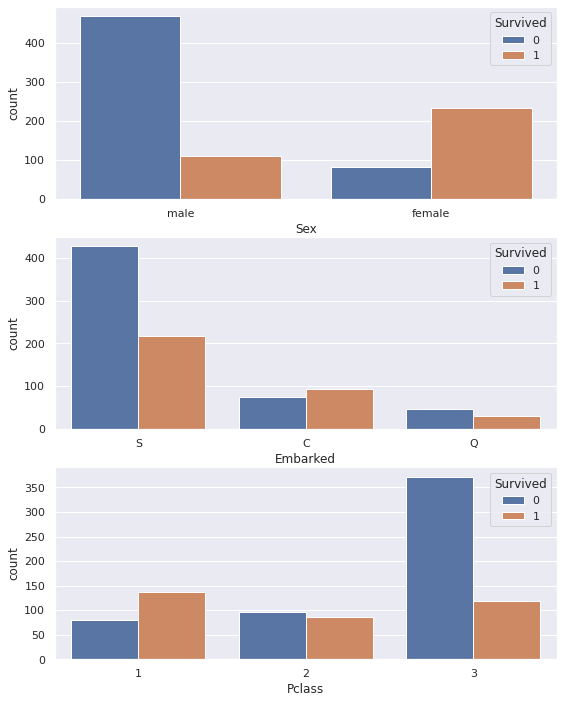

In [19]:

f, axes = plt.subplots(3, 1, figsize=(9, 12))
for f, ax in zip(categorical_variables, axes.ravel()):
    sns.countplot(x=train_data[f], data=train_data, hue='Survived', ax=ax)
sns.set(style="darkgrid")


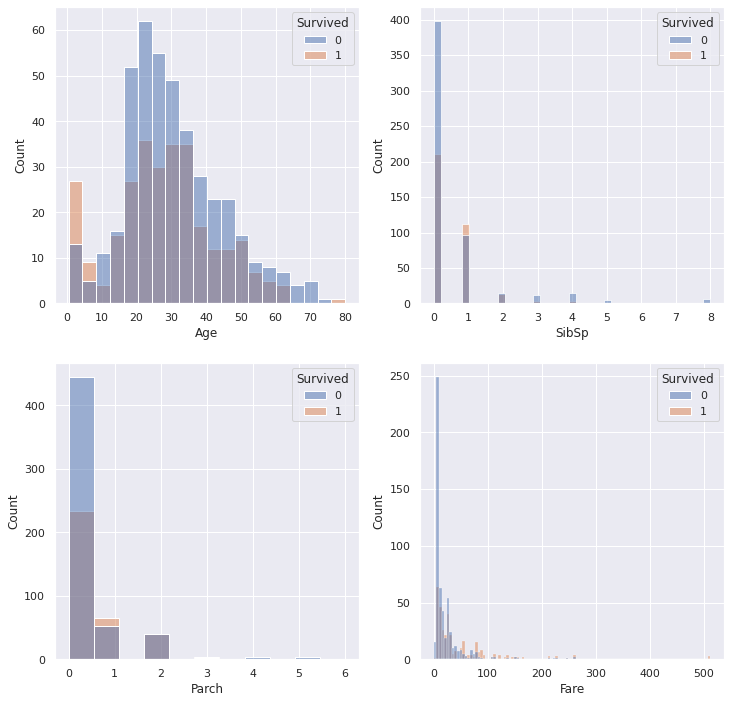

In [21]:
f, axes = plt.subplots(2, 2, figsize=(12, 12))
for f, ax in zip(numerical_variables, axes.ravel()):
    sns.histplot(x=train_data[f], data=train_data, hue='Survived', ax=ax)
sns.set(style="darkgrid")


In [ ]:
# X_train_copy = X_train
# y_train_copy = y_train
# y_train = y_train.astype(int)
# y_train = y_train.to_numpy()
# X_train = X_train.to_numpy()

# for model in [

#     LogisticRegression,
#     DecisionTreeClassifier,
#     KNeighborsClassifier,
#     GaussianNB,
#     SVC,
#     RandomForestClassifier,
#     xgboost.XGBClassifier
# ]:
#     if model == xgboost.XGBClassifier:
#         cls = model(use_label_encoder=False,verbosity= 0)
#     else:
#         cls = model()
#     kfold = model_selection.KFold(n_splits=5)
#     s = model_selection.cross_val_score(cls, X_train, y_train, scoring="roc_auc", cv=kfold)
#     print(
#         f"{model.__name__:22} AUC: "
#         f"{s.mean():.3f} STD: {s.std():.2f}"
#     )


In [ ]:
# my_submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived': prediction})
# # you could use any filename. We choose submission here
# my_submission.to_csv('submission.csv', index=False)
